**Tokenisation and Unigram Model**

/Users/nikhil/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


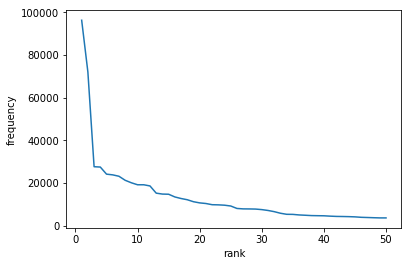

In [1]:
import operator
import matplotlib.pyplot as plt
import re

def add_unigram_to_list(token,case,main_word):  #unigrams_dict is of the form {token:[frequency,case satisfied,last word from which token generated]}
    if token not in unigrams_dict :
        unigrams_dict[token]=[1,"case:"+case,main_word]
    else :
        count=unigrams_dict[token][0]+1
        unigrams_dict[token]=[count,"case:"+case,main_word]        
        

def find_unigrams(token):
   # print token
    if len(token)==1:    #for single tokens like , . add token as it is
             add_unigram_to_list(token,"-1",token)

    elif re.match("[-+]*[0-9]+[\w\W]+",token) and not re.match('[-]*[0-9]*[,.][0-9]+',token) : # for separating units like px,km and commas and fulltop from end of numbers  
    #        print "case 0 "
            list0=re.findall(r"[\+\-']+", token)
            #print list0
            for word in list0:
                add_unigram_to_list(word,"0",token)
            list1= re.findall(r"[\d']+", token)
           # print list1
            for word in list1:
                add_unigram_to_list(word,"0",token)
            list2= re.findall(r"[^\d]+", token)
          #  print list2
            for word in list2:
                add_unigram_to_list(word,"0",token)
                
    elif re.match('[-]*[0-9]*[,.][0-9]*[\w\W]*',token):  #for keeping decimals and commas between numbers but separating units,commas,fullstop from end
           
            list0=re.findall(r"[\+\-']+", token)
            #print list0
            list1= re.findall(r"[0-9]*[,.][0-9]*", token) #number 
           # print list1
            prefix_length=0
            number_length=0
            if len(list0)>0:
                prefix_length+=len(list0[0])
            if len(list1)>0:
                number_length+=len(list1[0])
            prefix=token[0:prefix_length]
            number=token[prefix_length:(prefix_length+number_length)] 
           # print len(number)
            unit=token[(prefix_length+number_length):]
            if len(prefix)>0 :
               # print prefix
                add_unigram_to_list(prefix,"1",token)
            if len(number)>0 :
               # print number
                add_unigram_to_list(number,"1",token)
            if len(unit)>0:
               # print unit
                add_unigram_to_list(unit,"1",token)

          
    elif re.match('[$]([0-9]\?[,.])*',token):       #if numbers have currency $
         #   print "case 2 matched"
            add_unigram_to_list('$',"2",token)
            add_unigram_to_list(token[1:],"2",token)
        
    elif re.match('[0-9]{,2}[-/][0-9]{,2}[-/][0-9]{2,4}',token):  #dates like 18-12-1990
        #    print "case 3 matched"
            add_unigram_to_list(token,"3",token)
        
    elif re.match('[0-9]+\W',token):             #special characters have to be separated
        #    print "case 4 matched"
            #pattern =re.compile('\W')
            list1= re.findall(r"[\d']+", token)
            for word in list1:
                add_unigram_to_list(word,"4",token)
            list2= re.findall(r"[\W']+", token)
            for word in list2:
                add_unigram_to_list(word,"4",token)
        
    elif re.match('www.',token):                 #for urls
        #    print "case 5 matched"
            add_unigram_to_list(token,"5",token)
            
    elif re.match('[a-zA-Z._]+@[a-zA-Z]+\.[a-zA-Z]+',token): #for emails
        #    print "case 6 matched"
            add_unigram_to_list(token,"5",token)
            
    elif re.match("([A-Z][.])+",token):          #For words like U.S.A.
         #       print "case 7 matched"  
                add_unigram_to_list(token,"6",token)
                
    elif re.match("([A-Z][a-z][.])+",token):     #For words like Dr. ,Mr. ,Ph.D
        #        print "case 8 matched"
                add_unigram_to_list(token,"7",token)
    elif re.match("[\w][.,]",token):
             add_unigram_to_list(token,"7",token)
             
    #elif re.match("[\w]+'s\\b", token) :         #for words like Joe's
    elif re.match("[\w]+'s", token) :         #for words like Joe's

        list1=token.split("'s")
        if len(list1) >0 :
            add_unigram_to_list(list1[0],"8",token)
            add_unigram_to_list("'s","8",token)
            
        
        
    elif re.match("(\w*\W*)*",token):     #For any other special characters at end example (a)). will be broken into (, a,),) 
        list1= re.findall(r"[\w]+", token)
        for word in list1:
            add_unigram_to_list(word,"9",token)
        list2= re.findall(r"[{}().;,!\[\]*'\"/|\-\+%]+", token)
        for seq in list2:
            list_seq=list(seq)
            for word in list_seq:
                add_unigram_to_list(word,"9",token)
    else :
            add_unigram_to_list(token,"10",token)
            
    
def sort_descending(unigrams):
    return sorted(unigrams.items(), key=operator.itemgetter(1), reverse=True)
    
def plot(x,y):

    
    plt.plot(x, y)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    #show plot
    plt.show()

def find_x_y_for_plotting(ranked_list,unigrams_dict):
    dict_plot={}
    f1=open("output.txt", "w")
    for i in range(len(ranked_list)):
     #  print i
        word=ranked_list[i][0]                #fetching the word string from ranked list
     #   print word
        dict_plot[i+1]=unigrams_dict[word][0] #finding the frequency of word from unigrams_dict
        f1.write(word+"\t\t:\t"+str(unigrams_dict[word][0])+"\n")
    
    f1.close()
    return dict_plot
            
    
if __name__ == "__main__": 
    f1=open("anime.txt","r") #file to read
    unigrams_dict={}                  #Dictionary to hold unigrams and its count
    dict_plot={}                      #x=key=rank,y=value=frequency
    i=1
    for line in f1:
        if i%1000==0:
            print i
        i=i+1
        tokens=line.rstrip().split()
        for token in tokens :
            find_unigrams(token)
    ranked_list=sort_descending(unigrams_dict)  #key=word,value=frequency
    dict_plot=find_x_y_for_plotting(ranked_list,unigrams_dict)
    plot(dict_plot.keys()[:50],dict_plot.values()[:50]) #display for only 50 ranks
    plt.show()

In [2]:
unigrams_dict

{'pnvxxmu': [50,
  'case:9',
  '//static.tumblr.com/f13d8756e0339cf5573397e1cf66c0b7/pnvxxmu/50bmqswal/tumblr_static_tumblr_m1xfsyp4fh1qbbbw4o1_500.gif'],
 'bear': [99, 'case:9', 'bear'],
 'araragi': [199, 'case:9', 'araragi'],
 'shimotsuki': [50, 'case:9', 'shimotsuki'],
 'sleep': [50, 'case:9', 'sleep'],
 'hanging': [50, 'case:9', 'hanging'],
 'yzak': [50, 'case:9', 'yzak/athrun'],
 'dere': [50, 'case:9', 'dere'],
 'ricky': [50, 'case:9', 'ricky'],
 'hate': [499, 'case:9', 'hate'],
 'v4ocacj': [48, 'case:9', '//i.imgur.com/v4ocacj.gifv'],
 'votes': [100, 'case:9', 'votes'],
 'masaodidnothingwrong': [50, 'case:9', 'masaodidnothingwrong'],
 'paris': [50, 'case:9', 'paris'],
 'mcr': [50,
  'case:9',
  '//2.bp.blogspot.com/-icdg0dtryt8/vjexc38rlii/aaaaaaaadck/zh4cgi1ykt4/s1600/welcome-to-mcr.png'],
 'xf2ynhaeqvk': [100, 'case:9', 'xf2ynhaeqvk'],
 'bike': [50, 'case:9', 'bike'],
 'voted': [150, 'case:9', 'voted'],
 'under': [50, 'case:9', 'under'],
 'sorry': [200, 'case:9', 'sorry'],
 'er

**Bigram Model**

In [12]:
bigrams = {}
def get_bigrams(corpus):
    for sentence in corpus:
        for index, word in enumerate(sentence):
            if index > 0:
                pair  = (sentence[index - 1], word)
                if pair not in bigrams:
                    bigrams[pair] =0
                bigrams[pair] += 1
    return bigrams


# Note :: Try this with the smaller corpus first.

bigrams = get_bigrams(f1.read())
sorted_bigrams = sorted(bigrams.items(), key = lambda x: x[1], reverse=True)

sorted_bigrams = sorted_bigrams[:1000] # RAM problems
print(sorted_bigrams) 
#print(make_table(sorted_bigrams))


[]


In [5]:
f1

<open file 'anime.txt', mode 'r' at 0x115e8df60>

In [30]:
import requests
def get_corpus(url):
    return requests.get(url).text
corpus = get_corpus("http://localhost:8888/edit/anime.txt")

In [32]:
type(corpus)

unicode

In [10]:
type(corpus)

unicode

In [33]:
for line in f1:
    print line

In [15]:
unicode(f1.read())

u''

In [17]:
f1.read()

''

In [24]:
with open('anime.txt', 'r') as myfile:
    data=myfile.read()

In [25]:
type(data)

str

In [27]:
data = unicode(data,"iso-8859-1")

In [28]:
type(data)

unicode

In [29]:
get_bigrams(data)

{}

In [172]:
    bigrams = {}
    f1=open("anime.txt","r") #file to read
    for line in f1:
        line = line.rstrip().split()
        for index, word in enumerate(line):
            if index > 0:
                pair  = (line[index - 1], word)
                if pair not in bigrams:
                    bigrams[pair] =0
                bigrams[pair] += 1

In [49]:
bigrams

{('gawking', 'at'): 50,
 ('blast', 'during'): 50,
 ('to', 'stop'): 50,
 ('desu', 'ka'): 49,
 ('show', 'up'): 50,
 ('next', 'week'): 50,
 ('everything', 'so'): 49,
 ('later', 'time'): 100,
 ('old', 'design.'): 50,
 ('characters', '."'): 50,
 ('born', '*'): 50,
 ('it', 'looks'): 100,
 ('and', 'awesome.'): 50,
 ('ga', 'sukunai'): 50,
 ('road', '!'): 50,
 (':', '//i.imgur.com/x1ur8ya.png'): 50,
 ('real', 'life.'): 50,
 (';', 'kuma'): 50,
 ('battle', '.'): 50,
 ('is', '.'): 100,
 ('gameplay', 'and'): 50,
 ('here.', 'to'): 50,
 ('its', '10th'): 50,
 ('madan', 'no'): 50,
 ('still', 'in'): 50,
 ('kenshiro', 'from'): 50,
 ('you', 'have'): 249,
 ('got', "'em"): 50,
 ('shows', 'that'): 50,
 ('by', 'itself'): 50,
 ('guess', 'thats'): 50,
 ('and', 'that'): 50,
 ('k', 'should'): 50,
 ('show', '?'): 100,
 ('boobs', 'by'): 50,
 ('still', 'let'): 50,
 ('beats', 'is'): 50,
 (':', 'a'): 50,
 ('head', 'for'): 50,
 ('get', 'an'): 50,
 ('one', 'looks'): 49,
 ('discuss', 'polar'): 50,
 ('lost.', 'i'): 100,
 

In [50]:
trigrams = {}
f1=open("anime.txt","r") #file to read
for line in f1:
    line = line.rstrip().split()
    for index, word in enumerate(line):
        if index > 0:
            triple  = (line[index - 2],line[index - 1], word)
            if triple not in trigrams:
                trigrams[triple] =0
            trigrams[triple] += 1

In [51]:
trigrams

{('art', 'online', '*'): 50,
 ('bad', 'shows', 'and'): 50,
 ('that', 'episode', 'by'): 50,
 ('list', 'all', 'of'): 50,
 ('http', ':', '//i.imgur.com/yrxsitq.png'): 50,
 ('helpful', 'someday', '.'): 50,
 ('?', 'is', "n't"): 50,
 ('me', 'and', 'much'): 50,
 ('characters', 'i', 'guess'): 49,
 ('a', 'symbol', 'of'): 49,
 ('upon', 'it', '.'): 50,
 ('to', 'give', 'it'): 50,
 ('3', 'eps', 'before'): 50,
 ('nice', 'and', 'censored'): 49,
 ('fused', 'with', 'them'): 50,
 ('a', 'reference', 'to'): 50,
 ('https', ':', '//youtu.be/wwb01iumvza'): 50,
 ('""', 'i', 'thought'): 50,
 ('//i.imgur.com/wpovkuw.jpg', ')', '""'): 50,
 ('the', 'air', 'gears'): 50,
 ('air-kick', 'turns.', 'yey'): 50,
 ('every', 'link', 'except'): 49,
 ('meets', 'sao/log', 'horizon'): 50,
 ('dreamers', ']', '('): 50,
 ('to', 'an', 'opponent'): 50,
 ('to', 'see', 'new'): 50,
 ('ougi', 'facebook', 'profile'): 50,
 ('gears', 'manga', '.'): 50,
 (')', 'hayate', 'no'): 50,
 ('but', 'your', 'site'): 50,
 ('yet', 'when', 'i'): 50,
 (

In [54]:
    ranked_list=sort_descending(bigrams)  #key=word,value=frequency
    print ranked_list

[((']', '('), 18931), (('http', ':'), 10687), (('(', 'http'), 9470), (('https', ':'), 7537), (('(', 'https'), 7087), (('*', '*'), 7064), (('~', '~'), 3844), ((')', '['), 3038), (('i', "'m"), 2747), (('of', 'the'), 2487), ((')', '-'), 2450), (('|', '|'), 2401), (('it', "'s"), 2395), (('?', 'v'), 2388), (('//www.youtube.com/watch', '?'), 2388), (('v', '='), 2388), ((':', '//www.youtube.com/watch'), 2388), (('-', '['), 2350), (('i', "'ve"), 1995), (('do', "n't"), 1896), (('in', 'the'), 1744), (('*', ']'), 1600), (('!', '!'), 1600), (('[', '*'), 1550), (('this', 'is'), 1547), (('(', '#'), 1349), (('and', 'i'), 1346), (('[', '~'), 1300), (('~', ']'), 1300), ((')', '.'), 1297), (('but', 'i'), 1199), (('i', 'do'), 1197), (('[', ']'), 1079), (('ca', "n't"), 1050), ((')', '*'), 1050), (('to', 'the'), 1048), (('it', 'was'), 1048), (('i', 'love'), 1046), (('to', 'be'), 1045), (('/s', '""'), 1025), (('(', '/s'), 1025), (('&gt', ';'), 1009), (('.', 'i'), 997), (('*', '['), 950), (('[', 'this'), 948

In [67]:
list(bigrams)

[('gawking', 'at'),
 ('blast', 'during'),
 ('to', 'stop'),
 ('desu', 'ka'),
 ('show', 'up'),
 ('next', 'week'),
 ('everything', 'so'),
 ('later', 'time'),
 ('old', 'design.'),
 ('characters', '."'),
 ('born', '*'),
 ('it', 'looks'),
 ('and', 'awesome.'),
 ('ga', 'sukunai'),
 ('road', '!'),
 (':', '//i.imgur.com/x1ur8ya.png'),
 ('real', 'life.'),
 (';', 'kuma'),
 ('battle', '.'),
 ('is', '.'),
 ('gameplay', 'and'),
 ('here.', 'to'),
 ('its', '10th'),
 ('madan', 'no'),
 ('still', 'in'),
 ('kenshiro', 'from'),
 ('you', 'have'),
 ('got', "'em"),
 ('shows', 'that'),
 ('by', 'itself'),
 ('guess', 'thats'),
 ('and', 'that'),
 ('k', 'should'),
 ('show', '?'),
 ('boobs', 'by'),
 ('still', 'let'),
 ('beats', 'is'),
 (':', 'a'),
 ('head', 'for'),
 ('get', 'an'),
 ('one', 'looks'),
 ('discuss', 'polar'),
 ('lost.', 'i'),
 ('ended', 'up'),
 ('3t9pv9o0noy', ')'),
 ('a', 'glimpse'),
 ('anymore', 'but'),
 ('still', 'a'),
 ('unravel', '['),
 ('[', 'uplift'),
 ('1', 'of'),
 ('=', '_aw6wfuwuog'),
 ('it',

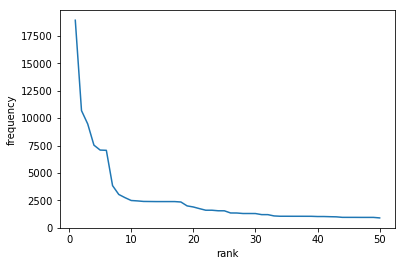

In [66]:
def find_x_y_for_plotting(ranked_list,unigrams_dict):
    dict_plot={}
    for i in range(len(ranked_list)):
     #  print i
        word=ranked_list[i][0]                #fetching the word string from ranked list
     #   print word
        dict_plot[i+1]=unigrams_dict[word] #finding the frequency of word from unigrams_dict
        
    return dict_plot

    
    
    
    
dict_plot=find_x_y_for_plotting(ranked_list,bigrams)
plot(dict_plot.keys()[:50],dict_plot.values()[:50]) #display for only 50 ranks
plt.show()

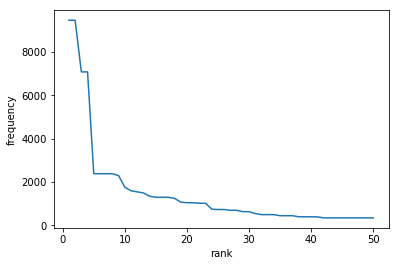

In [68]:
ranked_list=sort_descending(trigrams)  #key=word,value=frequency
dict_plot=find_x_y_for_plotting(ranked_list,trigrams)
plot(dict_plot.keys()[:50],dict_plot.values()[:50]) #display for only 50 ranks
plt.show()

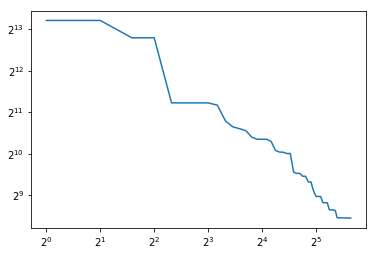

In [74]:

plt.loglog(dict_plot.keys()[:50],dict_plot.values()[:50], basex=2, basey=2)
plt.show()

In [87]:
def sort_dict(d, reverse = True):
    return sorted(d.items(), key = lambda x : x[1], reverse = reverse)

In [88]:
from ipy_table import *

In [89]:
finalunigrams={}
for key,value in unigrams_dict.iteritems():
    finalunigrams[key]=value[0]
    
sorted_unigrams = sort_dict(finalunigrams)
make_table(sorted_unigrams)

In [91]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
iplot([{"x" : list(zip(*sorted_unigrams))[0], "y": list(zip(*sorted_unigrams))[1]}])

In [92]:
import math
def unigram_probs(unigrams):
    new_unigrams = {}
    N = sum(unigrams.values())
    for word in unigrams:
        new_unigrams[word] =  round(unigrams[word] / float(N), 15)
        #new_unigrams[word] =  math.log(unigrams[word] / float(N))
    return new_unigrams


In [99]:
uprobs = unigram_probs(finalunigrams)
sorted_uprobs = sort_dict(uprobs,False)
make_table(sorted_uprobs)

In [100]:
iplot([{"x" : list(zip(*sorted_uprobs))[0], "y": list(zip(*sorted_uprobs))[1]}])

In [101]:
def add_one(unigrams,V):
    new_unigrams = {}
    N = sum(unigrams.values())
    for word in unigrams:
        new_unigrams[word] = round((unigrams[word] + 1)/ float(N+V), 15) * N
        #new_unigrams[word] = math.log((unigrams[word] + 1)/ float(N+V))
    return new_unigrams


In [102]:
unigrams = finalunigrams

In [103]:
smoothed_200 = sort_dict(add_one(unigrams, 200))
smoothed_2000 = sort_dict(add_one(unigrams, 2000))
smoothed_double = sort_dict(add_one(unigrams, len(unigrams)*10))
p1 = Scatter(x = list(zip(*sorted_uprobs))[0], y= list(zip(*sorted_unigrams))[1], mode='lines', name="unsmoothed")
p2 = Scatter(x = list(zip(*smoothed_200))[0], y= list(zip(*smoothed_200))[1], mode='lines', name="200")
p3 = Scatter(x = list(zip(*smoothed_2000))[0], y= list(zip(*smoothed_2000))[1], mode='lines', name="2000")
p4 = Scatter(x = list(zip(*smoothed_double))[0], y= list(zip(*smoothed_double))[1], mode='lines', name="double")
iplot([p1, p2, p3, p4])

In [116]:
smoothed_200 = sort_dict(add_one(trigrams, 200))
smoothed_2000 = sort_dict(add_one(trigrams, 2000))
#smoothed_double = sort_dict(add_one(unigrams, len(trigrams)*10))
p2 = Scatter(x = list(zip(*smoothed_200[-50:]))[0], y= list(zip(*smoothed_200[-50:]))[1], mode='lines', name="200")
p3 = Scatter(x = list(zip(*smoothed_2000[-50:]))[0], y= list(zip(*smoothed_2000[-50:]))[1], mode='lines', name="2000")
#p4 = Scatter(x = list(zip(*smoothed_double))[0], y= list(zip(*smoothed_double))[1], mode='lines', name="double")
iplot([p2, p3])

In [107]:
smoothed_double

[((']', '(', 'http'), 8066.13125391044),
 (('(', 'http', ':'), 8066.13125391044),
 ((']', '(', 'https'), 6036.610529798211),
 (('(', 'https', ':'), 6036.610529798211),
 (('//www.youtube.com/watch', '?', 'v'), 2034.6307217395383),
 (('https', ':', '//www.youtube.com/watch'), 2034.6307217395383),
 ((':', '//www.youtube.com/watch', '?'), 2034.6307217395383),
 (('?', 'v', '='), 2034.6307217395383),
 ((')', '-', '['), 1959.6840898795904),
 (('|', '|', '|'), 1503.1909685514195),
 (('*', ']', '('), 1363.5177000851959),
 (('*', '*', ']'), 1320.9343865293329),
 (('[', '*', '*'), 1278.3510729725228),
 ((']', '(', '#'), 1149.749466031032),
 (('~', ']', '('), 1108.0178187452823),
 (('~', '~', ']'), 1108.0178187452823),
 (('[', '~', '~'), 1108.0178187452823),
 (('-', '[', '~'), 1065.434505188472),
 (('[', ']', '('), 919.7995728248255),
 (('-', '[', '*'), 895.1012509621788),
 (('i', 'do', "n't"), 892.5462521480503),
 ((']', '(', '/s'), 873.8095941837738),
 (('(', '/s', '""'), 873.8095941837738),
 ((

In [117]:
bigrams = {}
f1=open("anime.txt","r") #file to read
data = f1.read()

In [118]:
training = data[:5000]

In [121]:
heldout = data[5000:10000]

In [128]:
for line in training:
    tokens=line.rstrip().split()
    for token in tokens :
        find_unigrams(token)


In [127]:
unigramstrain={}
def add_unigram_to_list(token,case,main_word):  #unigrams_dict is of the form {token:[frequency,case satisfied,last word from which token generated]}
    if token not in unigrams_dict :
        unigramstrain[token]=[1,"case:"+case,main_word]
    else :
        count=unigrams_dict[token][0]+1
        unigramstrain[token]=[count,"case:"+case,main_word]        


In [161]:
def get_unigrams(corpus):
    unigrams = {}
    corpus=corpus.rstrip().split()
    for word in corpus:
        word = word.lower()
        if word not in unigrams:
            unigrams[word] = 0
        unigrams[word] += 1
    return unigrams

In [162]:
training = unicode(training)
utraining = get_unigrams(training)
print utraining
#uheldout = get_unigrams(heldout)

{u'iron-blooded': 1, u'themed': 1, u'patlabor': 1, u'all': 3, u'themes': 1, u'referring': 1, u'everything': 2, u'tv': 1, u'to': 11, u'must': 1, u'worth': 1, u'ta': 1, u'far': 2, u'o/.': 1, u'edo': 1, u'worst': 1, u'airing': 1, u'entire': 1, u'magic': 1, u'did': 2, u'eve': 1, u'samurai': 1, u'good.': 1, u'enjoy': 1, u'booty': 1, u'medieval': 1, u"n't": 9, u'what': 3, u'tribute': 1, u'full': 1, u'men': 1, u'punch': 1, u'//i.imgur.com/oipxm9w.gifv': 1, u'[': 22, u'legend': 1, u'wait': 3, u'boy': 1, u'great': 2, u'fate/zero': 1, u'alchemist': 1, u'action': 3, u'aka': 1, u'sticking': 1, u'love': 4, u'puella': 1, u'everybody': 1, u'cheating': 1, u'from': 3, u'would': 4, u'//i.imgur.com/v0dvele.png': 1, u'live': 1, u'call': 1, u'https': 5, u'more': 3, u'holy': 1, u'sarutobi': 1, u'basically': 2, u'glad': 2, u'off.': 1, u'me': 1, u'ibo': 1, u'this': 12, u'baccano': 1, u'itself': 1, u'del': 1, u'can': 2, u'praise': 1, u'v': 2, u'my': 2, u'dedicated': 1, u'give': 1, u'awesome': 2, u'want': 1, u'

In [163]:
def eq_classes(ugrams):
    eq = {}
    for k, v in ugrams.items():
        if v not in eq:
            eq[v] = []
        eq[v].append(k)
    return eq

In [164]:
tr_eq_cls = eq_classes(utraining)
for r in tr_eq_cls:
    print(r, tr_eq_cls[r])


(1, [u'iron-blooded', u'themed', u'patlabor', u'themes', u'referring', u'tv', u'must', u'worth', u'ta', u'o/.', u'edo', u'worst', u'airing', u'entire', u'magic', u'eve', u'samurai', u'good.', u'enjoy', u'booty', u'medieval', u'tribute', u'full', u'men', u'punch', u'//i.imgur.com/oipxm9w.gifv', u'legend', u'boy', u'fate/zero', u'alchemist', u'aka', u'sticking', u'puella', u'everybody', u'cheating', u'//i.imgur.com/v0dvele.png', u'live', u'call', u'holy', u'sarutobi', u'off.', u'me', u'ibo', u'baccano', u'itself', u'del', u'praise', u'dedicated', u'give', u'want', u'absolute', u'travel', u'watching', u'fullmetal', u'1', u'anime/manga', u'comedy', u'galactic', u'gintama', u'bothered', u'adventure', u'heroes', u'guys', u'man', u'remember', u'poinyaaa', u'seirei', u'\xf6', u'manga', u'over', u'through', u'looks', u'hip-hop', u'before', u'thank', u'interesting', u'squaring', u'might', u'good', u'pure', u'sooner', u'kiss', u'shounen', u'\\', u'always', u'sasuke', u'went', u'shaking', u'senkan

In [165]:
def get_heldout(hugrams, eq):
    hest = {}
    for r in eq:
        t_r = sum([hugrams[u] for u in eq[r] if u in hugrams])
        hest[r] = t_r
    return hest

In [166]:
hestimate = get_heldout(uheldout, tr_eq_cls)
N = sum(list(utraining.values()))
new_estimates = []
old_estimates = []
for r, t_r in sorted(hestimate.items()):
    new_estimates +=  [t_r/(len(tr_eq_cls[r])*N)]
    old_estimates += [r/N]
    print(r, len(tr_eq_cls[r]), hestimate[r], hestimate[r]/len(tr_eq_cls[r]), hestimate[r]/(len(tr_eq_cls[r]) * N), r/N)

(1, 278, 0, 0, 0, 0)
(2, 55, 0, 0, 0, 0)
(3, 15, 0, 0, 0, 0)
(4, 13, 0, 0, 0, 0)
(5, 9, 0, 0, 0, 0)
(6, 2, 0, 0, 0, 0)
(7, 1, 0, 0, 0, 0)
(8, 2, 0, 0, 0, 0)
(9, 3, 0, 0, 0, 0)
(10, 1, 5000, 5000, 5, 0)
(11, 2, 0, 0, 0, 0)
(12, 2, 0, 0, 0, 0)
(15, 1, 0, 0, 0, 0)
(16, 1, 0, 0, 0, 0)
(17, 1, 0, 0, 0, 0)
(18, 1, 0, 0, 0, 0)
(22, 2, 0, 0, 0, 0)
(24, 1, 0, 0, 0, 0)
(25, 3, 0, 0, 0, 0)
(26, 1, 0, 0, 0, 0)
(27, 1, 0, 0, 0, 0)


In [167]:
p1 = Bar(x = list(hestimate.keys()), y = old_estimates, name='unsmoothed')
p2 = Bar(x = list(hestimate.keys()) , y = new_estimates, name='smoothed')
iplot([p1,p2])

# Good Turing

In [168]:
nrs = eq_classes(unigrams)
nr_counts = {k : len(v) for k, v in nrs.items()}
nr_probs = {k : (k*v)/float(N) for k, v in nr_counts.items()} # P = r * Nr / N
sorted_nrs = sorted(nr_counts.items())
sorted_probs = sorted(nr_probs.items())
nr_counts

{11: 3,
 21: 2,
 31: 15,
 48: 20,
 49: 258,
 50: 2284,
 81: 2,
 96: 2,
 98: 17,
 99: 60,
 100: 472,
 111: 1,
 147: 3,
 148: 11,
 149: 38,
 150: 154,
 151: 1,
 181: 2,
 187: 1,
 195: 1,
 196: 1,
 197: 5,
 198: 15,
 199: 33,
 200: 89,
 220: 1,
 221: 1,
 226: 1,
 231: 1,
 247: 3,
 248: 8,
 249: 24,
 250: 60,
 281: 1,
 287: 1,
 295: 1,
 297: 2,
 298: 7,
 299: 14,
 300: 34,
 346: 1,
 347: 3,
 349: 16,
 350: 28,
 381: 1,
 396: 1,
 397: 2,
 398: 7,
 399: 10,
 400: 18,
 409: 1,
 446: 3,
 447: 1,
 448: 2,
 449: 18,
 450: 9,
 497: 1,
 498: 6,
 499: 9,
 500: 6,
 530: 1,
 547: 2,
 548: 3,
 549: 6,
 550: 3,
 597: 2,
 598: 5,
 599: 8,
 600: 4,
 645: 2,
 646: 1,
 647: 4,
 648: 5,
 649: 6,
 650: 3,
 694: 1,
 695: 1,
 697: 1,
 698: 1,
 699: 3,
 700: 5,
 720: 1,
 744: 1,
 745: 1,
 747: 2,
 748: 4,
 749: 3,
 750: 3,
 781: 1,
 788: 1,
 796: 2,
 797: 2,
 798: 2,
 799: 1,
 846: 1,
 847: 1,
 848: 6,
 849: 4,
 850: 2,
 897: 2,
 898: 2,
 899: 1,
 900: 2,
 946: 1,
 947: 1,
 948: 3,
 950: 2,
 996: 1,
 997: 1,
 9

# Witten bell

In [169]:
def witten_bell(w, bigrams, unigrams):
    
    #wb_lambda = get_lambdaval(prior, text)
    #new_prior = ' '.join(prior.split()[:-1])
    #wb_prob = (1-wb_lambda)*laplace_mle(lik, prior, text) + wb_lambda*witten_bell(lik, new_prior, text)
    wprobs = {}
    prior_count = sum(list(bigrams[w].values()))
    type_count = len(list(bigrams[w].keys()))
    bprobs = {}
    for b in bigrams[w]:
        ngram_count = bigrams[w][b] / float(prior_count)
        bprobs[b]= ngram_count
        #vocab_size = len(get_vocab(text))
        wblambda = type_count / float(type_count + prior_count)
        wb_prob = (1-wblambda)*ngram_count + wblambda*unigrams[w]
        #print(unigrams[w])
        wprobs[b] = wb_prob
    return bprobs, wprobs
    #z = vocab_size - type_count
    #if ngram_count == 0:
    #    wb_prob = float(type_count)/float(z*(prior_count + type_count))
    #else:
    #    wb_prob = float(ngram_count)/float(prior_count + type_count)
    #return wb_prob

In [187]:
bprobs, wprobs = witten_bell('worth', bigrams, uprobs)
sorted_bprobs = sort_dict(bprobs)
sorted_wprobs = sort_dict(wprobs)

iplot([
    Scatter({"x" : list(zip(*sorted_bprobs))[0], "y": list(zip(*sorted_bprobs))[1]}, name="original"),
    Scatter({"x" : list(zip(*sorted_wprobs))[0], "y": list(zip(*sorted_wprobs))[1]}, name="wittenbell"),
     

])

[50,
 50,
 50,
 49,
 50,
 50,
 49,
 100,
 50,
 50,
 50,
 100,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 100,
 50,
 50,
 50,
 50,
 50,
 50,
 249,
 50,
 50,
 50,
 50,
 50,
 50,
 100,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 100,
 148,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 48,
 50,
 50,
 50,
 50,
 100,
 50,
 50,
 50,
 50,
 100,
 50,
 50,
 49,
 50,
 50,
 50,
 150,
 50,
 50,
 50,
 50,
 50,
 50,
 18931,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 150,
 50,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 50,
 50,
 100,
 50,
 150,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 100,
 50,
 49,
 50,
 250,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 98,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 250,
 50,
 50,
 50,
 50,
 100,
 50,
 50,
 49,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 150,
 49,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 100,
 50,
 50,
 50,
 50,
 50,
 49,
 50,
 49,
 50,
 50,
 247,
 5

In [177]:
def get_bigrams(corpus):
    bigrams = {}
    for sentence in corpus:
        for index, word in enumerate(sentence):
            if index > 0:                
                word = word.lower()            
                prev = sentence[index - 1].lower()
                if prev not in bigrams:
                    bigrams[prev] = {}
                if word not in bigrams[prev]:
                    bigrams[prev][word]  = 0
                bigrams[prev][word] += 1
    return bigrams

In [181]:
bigrams = get_bigrams(data)

In [184]:
bigrams = {}
f1=open("anime.txt","r") #file to read
for line in f1:
    line = line.rstrip().split()
    for index, word in enumerate(line):
        if index > 0:
            word=word.lower()
            prev = line[index-1]
            if prev not in bigrams:
                bigrams[prev] ={}
            if word not in bigrams[prev]:
                bigrams[prev][word] =0
            bigrams[prev][word] +=1


In [185]:
bigrams

{'ever.': {'it': 49},
 'better.': {')': 50, 'easily': 50, 'i': 50, 'poor': 50},
 'bear': {')': 50, 'is': 49},
 'araragi': {'*': 100, 'talk': 49, 'x': 50},
 'chaos': {'as': 50},
 'shimotsuki': {'(': 50},
 'sleep': {'in': 50},
 'hanging': {'out': 50},
 'dere': {'.': 50},
 'captain': {'earth': 49},
 'hate': {'all': 50,
  'asuka': 50,
  'how': 49,
  'it': 50,
  'of': 50,
  'society': 50,
  'that': 100,
  'the': 50,
  'you': 50},
 'non-hentai': {'anime': 50},
 'up.': {'i': 50},
 'votes': {'.': 50, 'i': 50},
 '//i.imgur.com/ovtquno.png': {')': 50},
 'masaodidnothingwrong': {')': 50},
 'paris': {'hilton': 50},
 'xf2ynhaeqvk': {')': 100},
 'bike': {'*': 50},
 'voted': {'because': 50, 'for': 50, 'that': 50},
 'under': {'the': 50},
 '//myanimelist.net/anime/29163/sore_ga_seiyuu': {')': 50},
 'ergo': {'proxy': 100},
 'worth': {'all': 50, 'it.': 50, 'trying': 50, 'watching': 100},
 'kyuubu': {'latifah': 50},
 'merchant': {'discuss': 50},
 '@': {'ganbaranai': 50, 'ster': 50},
 'vash': {'?': 50, ']'